In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2


In [3]:
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
data.isnull().sum()


,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [7]:
data.shape

(3276, 10)

In [8]:
data.fillna(data.median(), inplace=True)


In [9]:
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [11]:
# Normalizing the data
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

In [12]:
# Checking Class Imbalance
print(data['Potability'].value_counts(normalize=True))


Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64


In [20]:
# Oversampling with SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except 'Potability'
y = data['Potability']  # Target column

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame (optional)
data_balanced = pd.DataFrame(X_resampled, columns=data.columns[:-1])
data_balanced['Potability'] = y_resampled

# Check new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 1998, 1: 1998})


In [21]:
data_balanced['Potability'].value_counts(normalize=True)


,proportion
Potability,
0,0.5
1,0.5


In [22]:
Y = data_balanced['Potability']
X = data_balanced.drop(['Potability'], axis=1)

In [16]:
print(data.drop_duplicates())


            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0    -0.025474  0.259195 -0.139471     0.112415  0.965957      1.708954   
1    -2.284717 -2.036414 -0.385987    -0.307694 -0.014799      2.062575   
2     0.697319  0.847665 -0.240047     1.360594 -0.014799     -0.094032   
3     0.845393  0.547651  0.000493     0.592008  0.644130     -0.778830   
4     1.372982 -0.464429 -0.460249    -0.363698 -0.649522     -0.343939   
...        ...       ...       ...          ...       ...           ...   
3271 -1.637002 -0.081758  2.916188     0.028027  0.728872      1.240155   
3272  0.499833 -0.085667 -0.534295     0.593290 -0.014799     -0.417706   
3273  1.595654 -0.626829  1.270810     0.144017 -0.014799      0.072263   
3274 -1.324949  1.041355 -1.144058    -0.517373 -0.014799     -0.288597   
3275  0.544611 -0.038546 -0.525812     0.244515 -0.014799     -1.221919   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          -1.180651         1.30543

In [23]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [127]:
#Build Neural Network
#Build Neural Network
# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Helps stabilize learning
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
#Train The Model
# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.001)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5210 - loss: 0.7579 - val_accuracy: 0.5500 - val_loss: 0.6845
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5900 - loss: 0.6913 - val_accuracy: 0.5738 - val_loss: 0.6697
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5974 - loss: 0.6643 - val_accuracy: 0.5900 - val_loss: 0.6506
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6250 - loss: 0.6470 - val_accuracy: 0.6112 - val_loss: 0.6324
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6379 - loss: 0.6299 - val_accuracy: 0.6375 - val_loss: 0.6178
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6656 - loss: 0.6122 - val_accuracy: 0.6375 - val_loss: 0.6173
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6407 - loss: 0.6208 - val_accuracy: 0.6425 - val_loss: 0.6121
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6707 - loss: 0.6015 - val_ac

In [129]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [130]:
#F1 score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report
f1 = f1_score(y_test, y_pred_classes)
print(f"\nF1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


F1 Score: 0.6634

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       400
           1       0.65      0.68      0.66       400

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800



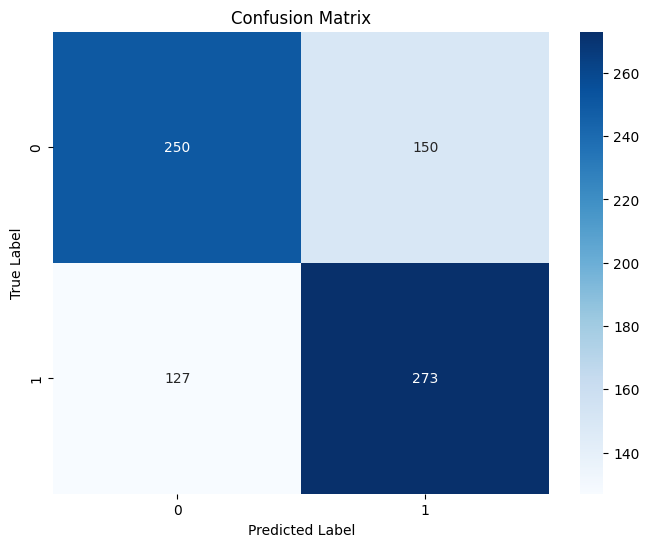


Metrics from Confusion Matrix:
Accuracy: 0.6538
Precision: 0.6454
Recall: 0.6825
F1 Score: 0.6634


In [131]:
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and print metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("\nMetrics from Confusion Matrix:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

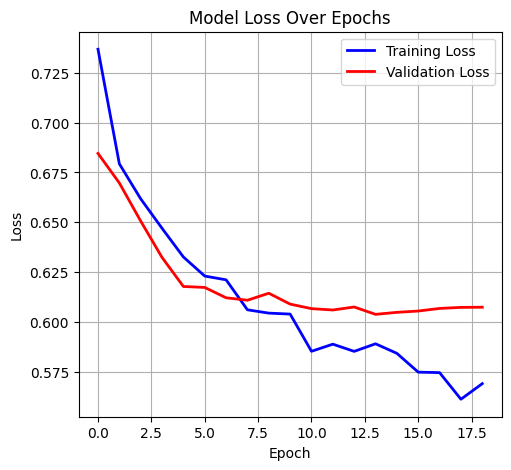

In [132]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)